In [160]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [161]:
#Usage summary table
#Each row for each day a user logged into product SORTED by user_id; not DATE
usage_sum = pd.read_csv('C:/Users/seid/Desktop/Springboard/relax_challenge/takehome_user_engagement.csv'
                      ,encoding="latin-1")
usage_sum.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [162]:
#A user table with data on 12000 users wo signed up for the product in the last two years
users = pd.read_csv('C:/Users/seid/Desktop/Springboard/relax_challenge/takehome_users.csv'
                    ,encoding = "latin-1")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [163]:
#Total number of null values
total= users.isnull().sum()
total

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

# Exploratory Data Analysis of the Users 

In [164]:
#let's investigate the user data table
import datetime as dt
d = pd.to_datetime(users['creation_time'])
d.head()

0   2014-04-22 03:53:30
1   2013-11-15 03:45:04
2   2013-03-19 23:14:52
3   2013-05-21 08:09:28
4   2013-01-17 10:14:20
Name: creation_time, dtype: datetime64[ns]

In [165]:
#Let's see the time-stamps further
users['month'] = d.dt.month
users['day'] = d.dt.weekday_name
users['hour'] = d.dt.hour
users['year'] = d.dt.year

In [166]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month,day,hour,year
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,4,Tuesday,3,2014
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,11,Friday,3,2013
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,Tuesday,23,2013
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5,Tuesday,8,2013
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,Thursday,10,2013


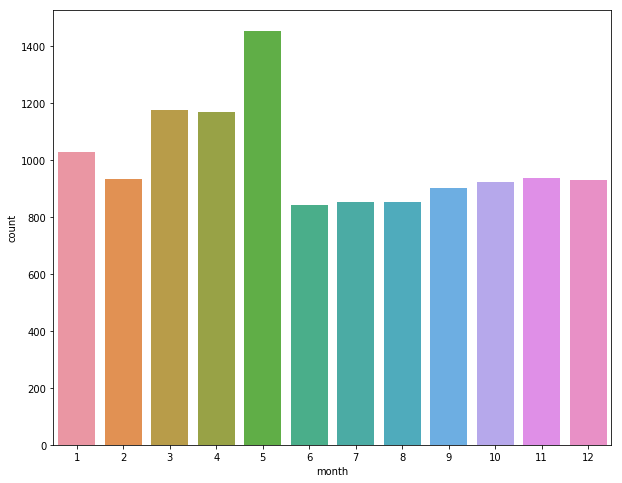

In [167]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="month", data=users)
#More accounts are created in the first five months than the rest.May is the highest among them

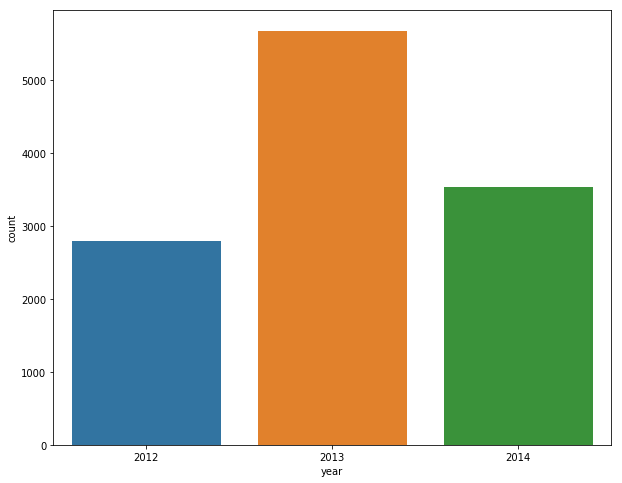

In [168]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="year", data=users)
#A lot of accounts are created in the year 2013

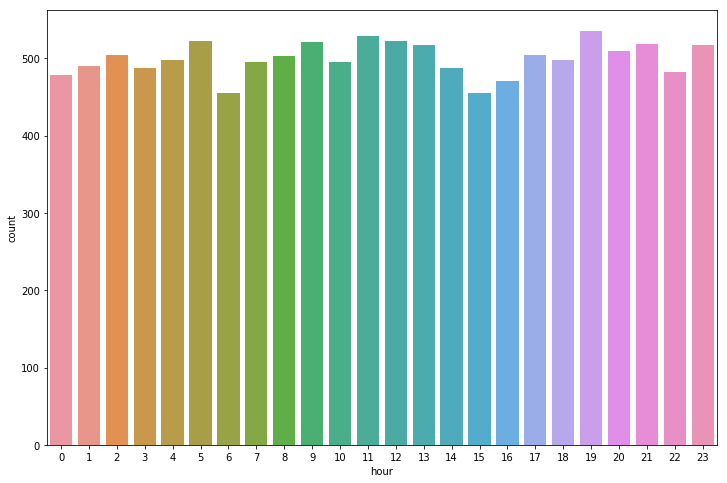

In [169]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="hour", data=users)
#hourly account creation are non-uniform

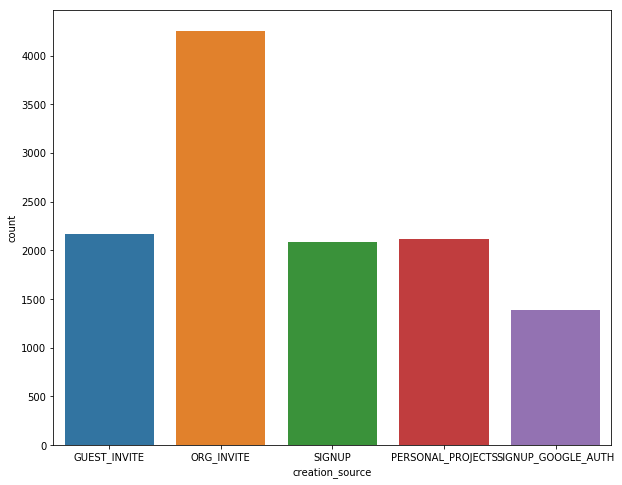

In [170]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="creation_source", data=users)
#org_invite has a lot of the creation_source

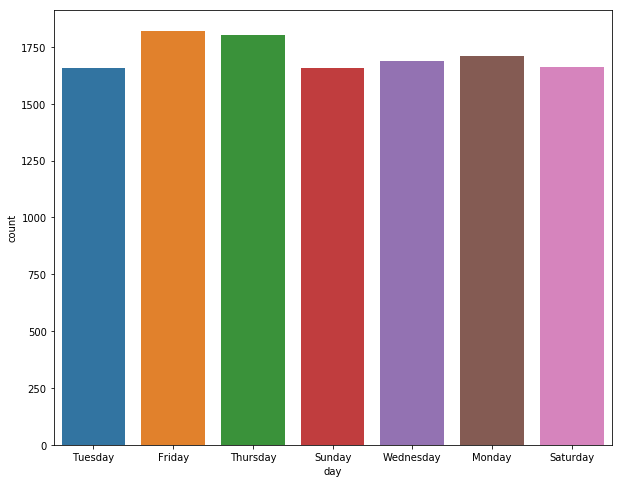

In [171]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="day", data=users)
#Friday and saturday have more counts 

In [172]:
users.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month,day,hour,year
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,9,Friday,6,2013
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,1,Thursday,18,2013
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,4,Sunday,12,2014
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,5,Thursday,11,2012
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,NaN,1,Sunday,8,2014


In [173]:
import os
mingw_path = 'C:/Program Files (x86)\mingw-w64/i686-8.1.0-posix-dwarf-rt_v6-rev0/mingw32/bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [175]:
def logged(time):
    initial=pd.to_datetime(time).sort_values().reset_index(drop=True)
    final=initial[2:].reset_index(drop=True)
    return 1 if  ((final-initial[:-2]) >= pd.Timedelta('7 days')).sum()>=0 else 0

In [176]:
usage_sum['adopted_user']=usage_sum.groupby('user_id')['time_stamp'].apply(logged)

In [177]:
users['adopted_user']=usage_sum['adopted_user']

In [178]:
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month,day,hour,year,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,4,Tuesday,3,2014,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,11,Friday,3,2013,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,Tuesday,23,2013,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5,Tuesday,8,2013,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,Thursday,10,2013,1.0


In [179]:
#Let's sort the "usage_sum" by "users" number of visits and 
#let's get "user_id"'s that have cumulative =>3 visits
user_visits = usage_sum["user_id"].value_counts()
adopted = user_visits[user_visits >= 3]



In [180]:
#We check the users visit is f it fits the criteria or =NaN-->0 if it does not fit 
#index is used to access the users "object_id"
for index, val in adopted.iteritems(): 
    users.loc[users['object_id'] == index, 'adopted_user'] =1
    


In [181]:
#Let's peek the users table
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,month,day,hour,year,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,4,Tuesday,3,2014,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,11,Friday,3,2013,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3,Tuesday,23,2013,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5,Tuesday,8,2013,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,Thursday,10,2013,1.0


In [182]:
#let's use the relevant columns
features = users[['creation_time','creation_source', 'opted_in_to_mailing_list','org_id',
                  'invited_by_user_id','enabled_for_marketing_drip','adopted_user','object_id']]

In [183]:
features['creation_time'] = pd.to_datetime(features['creation_time'])

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [184]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features['creation_source'] = encoder.fit_transform(features['creation_source'])

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [185]:
#Its important to try to check weekday,hour,month,weekofyear of the year to see if we get any info. 
features['weekday']=features['creation_time'].dt.weekday
features['hour']=features['creation_time'].dt.hour
features['month']=features['creation_time'].dt.month
features['weekofyear']=features['creation_time'].dt.weekofyear

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [186]:
features.columns

Index(['creation_time', 'creation_source', 'opted_in_to_mailing_list',
       'org_id', 'invited_by_user_id', 'enabled_for_marketing_drip',
       'adopted_user', 'object_id', 'weekday', 'hour', 'month', 'weekofyear'],
      dtype='object')

In [187]:
#Let's fill 0 in place of NaN
X = features[['opted_in_to_mailing_list', 'org_id',
       'invited_by_user_id', 'enabled_for_marketing_drip', 'weekday',
       'hour', 'month', 'weekofyear']].fillna(0).astype(np.float)

In [188]:
#Drop all NaN values for simplicity
Y = users['adopted_user'].fillna(0)

In [189]:
#Split-out validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Evaluate Algorithms

In [190]:
#Let's test a random forest classifier with a sample values
clfrfc=RandomForestClassifier(n_estimators=250,max_depth=12, class_weight='balanced', random_state=5)
clfrfc.fit(X_train,y_train)
print ('Accuracy of training data: ',(accuracy_score(clfrfc.predict(X_train), y_train)))
print ('Accuracy of test data: ',(accuracy_score(clfrfc.predict(X_test), y_test)))

Accuracy of training data:  0.957
Accuracy of test data:  0.746


In [191]:
#The classification report summary
print ('Classification report summary of RandomForest')
print(classification_report(clfrfc.predict(X_test), y_test))

Classification report summary of RandomForest
             precision    recall  f1-score   support

        0.0       0.05      0.14      0.07       201
        1.0       0.93      0.79      0.85      2799

avg / total       0.87      0.75      0.80      3000



In [192]:
#feature importance score
importances =clfrfc.feature_importances_
importances

array([0.02807424, 0.24635187, 0.19156215, 0.02402321, 0.10033891,
       0.16729905, 0.07845291, 0.16389765])

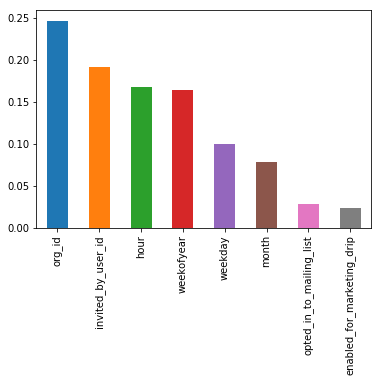

In [193]:
#Let's plot the feature importance
imp_rfc=pd.Series(importances,index=X.columns)
imp_rfc.sort_values(ascending=False).plot(kind='Bar')
#'orig_id','hour','invited_by_user_id','weekofyear' have higher score and are more important

In [194]:
#Let's check stochastic gradient classifier model to check if it fits a linear classifier model
from sklearn.linear_model import SGDClassifier
clfsgd = SGDClassifier(loss='hinge',penalty='l2')
clfsgd.fit(X_train,y_train)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [195]:
predict_sgd = clfsgd.predict(X_test)
predict_sgd

array([1., 1., 1., ..., 1., 1., 1.])

In [196]:
#The SGD classifier model has an better accuracy than the random forest classifier 
predictions_sgd = [round(value) for value in predict_sgd]
accuracy = accuracy_score(y_test , predictions_sgd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.33%


In [197]:
#Lets try an ensemble model(gradient boosting classifier)
from xgboost import XGBClassifier
clfxgb=XGBClassifier()
xgb_model=clfxgb.fit(X_train,y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [198]:
pred_xgb = clfxgb.predict(X_test)
pred_xgb

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1., 1., 1., ..., 1., 1., 1.])

In [199]:
predictions_xgb = [round(value) for value in pred_xgb]
accuracy = accuracy_score(y_test , predictions_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.27%


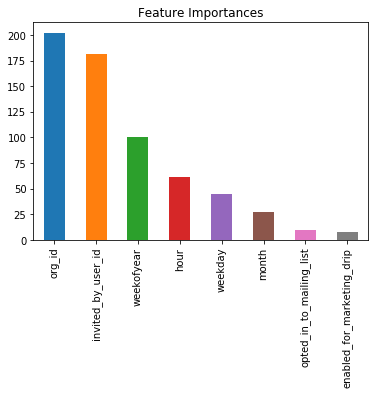

In [200]:
#Let's plot the important features
important_features = pd.Series(xgb_model.get_booster().get_fscore()).sort_values(ascending=False)
important_features.plot(kind='bar', title='Feature Importances')

Conclusion

We can see that XGBClassifier has a better accuracy than the other models. We know that SGBClassifier is very sensitive to scaling of  the data but in our case the scaling of the data does not seem to have a big impact.The most important factors are org_id, invited_by_user_id and weekofyear.

Last but not least, It would very helpful if we could have more features to select from in order to better understand/predict an "adopted_user". For instance,  having usage data on certain services helps us to determine level of user engagement than using extrapolation with with the existing features.
